## Importing Libraries 

The code imports essential Python libraries for data manipulation, visualization, and machine learning, including NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, Plotly.

In [12]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

## Loading Data

The code snippet handles the compilation of data from multiple CSV files for different years into a single DataFrame. A DataFrame is created by reading data from a CSV file for the year 2022.

In [2]:
# The dataset was available in different csv files for each year, we created a single dataframe of records and saved the data frame on drive. 
data_location = [
    'C:\\Users\\2020.csv',
    'C:\\Users\\2021.csv',
    'C:\\Users\\2019.csv',
    'C:\\Users\\2018.csv',
    'C:\\Users\\2017.csv',
    'C:\\Users\\2016.csv',
    'C:\\Users\\2015.csv',
    'C:\\Users\\2014.csv'
]
df = pd.read_csv('C:\\Users\\2022.csv')

The code defines a concise function, day_col(x), that takes a date as input and returns the corresponding day of the week as an integer.  It utilizes the strftime method to extract the day of the week and convert it into an integer.

In [3]:
def day_col(x):
    return int(x.strftime("%w"))

## Exploratory Data Analysis

In [5]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12789250,JF351068,01/01/2022 12:00:00 AM,079XX S ST LAWRENCE AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,6.0,44,06,1181612.0,1852489.0,2022,11/12/2022 03:46:21 PM,41.750462,-87.610059,"(41.75046233, -87.610058986)"
1,12783300,JF343908,01/01/2022 12:00:00 AM,007XX N MICHIGAN AVE,0580,STALKING,SIMPLE,STREET,False,False,...,42.0,8,08A,1177293.0,1905597.0,2022,11/12/2022 03:46:21 PM,41.896294,-87.624280,"(41.896293625, -87.624279611)"
2,12814497,JF380963,01/01/2022 12:00:00 AM,047XX W WABANSIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE - GARAGE,False,True,...,37.0,25,17,1144610.0,1910885.0,2022,11/12/2022 03:46:21 PM,41.911483,-87.744185,"(41.911482929, -87.744185282)"
3,12822046,JF389504,01/01/2022 12:00:00 AM,039XX N PINE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,46.0,6,11,1170694.0,1926410.0,2022,11/12/2022 03:46:21 PM,41.953553,-87.647905,"(41.953552585, -87.647905229)"
4,12836994,JF403613,01/01/2022 12:00:00 AM,042XX W WASHINGTON BLVD,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,28.0,26,08B,1148076.0,1900155.0,2022,11/12/2022 03:46:21 PM,41.881973,-87.731729,"(41.881972634, -87.731728591)"


This code snippet utilizes Matplotlib to create a line plot that visualizes the monthly trend of crimes based on the provided DataFrame. The plot is configured to show the count of crimes over each month.

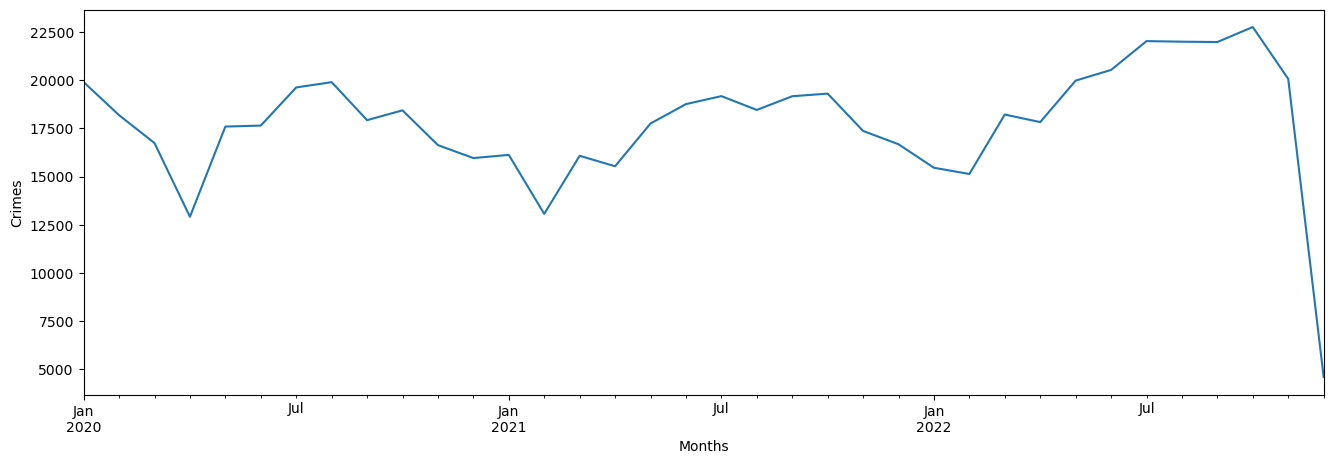

In [108]:
plt.figure(figsize=[16,5])

df.resample('M').size().plot(legend=False)
plt.xlabel('Months')
plt.ylabel('Crimes')
plt.show()

This code snippet aims to visualize the distribution of crime types in the DataFrame. It utilizes the value_counts method to count occurrences of each unique value in the 'Primary Type' column and then creates a bar plot to illustrate the frequency of each crime type.

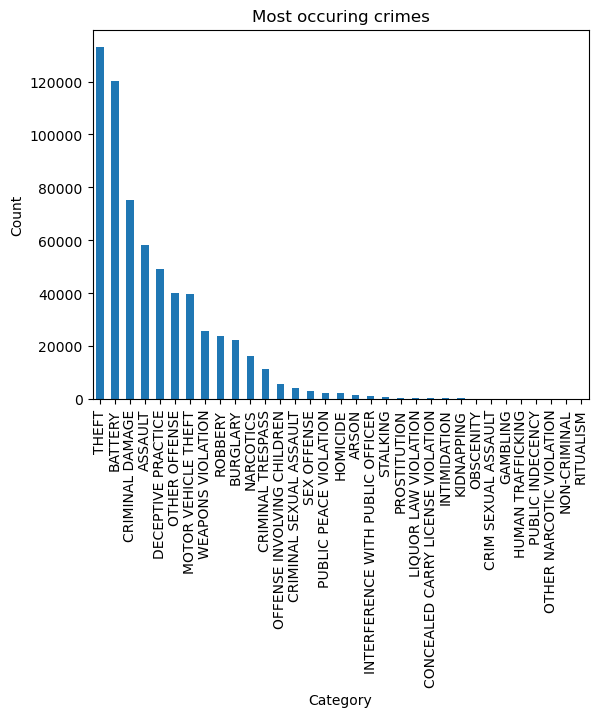

In [109]:
value_counts = df['Primary Type'].value_counts()

value_counts.plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Most occuring crimes')
plt.show()

This code snippet focuses on visualizing the distribution of crimes based on different location descriptions in the DataFrame. It employs the value_counts method to count occurrences of each unique value in the 'Location Description' column, then creates a bar plot to display the top 15 locations with the highest crime counts.

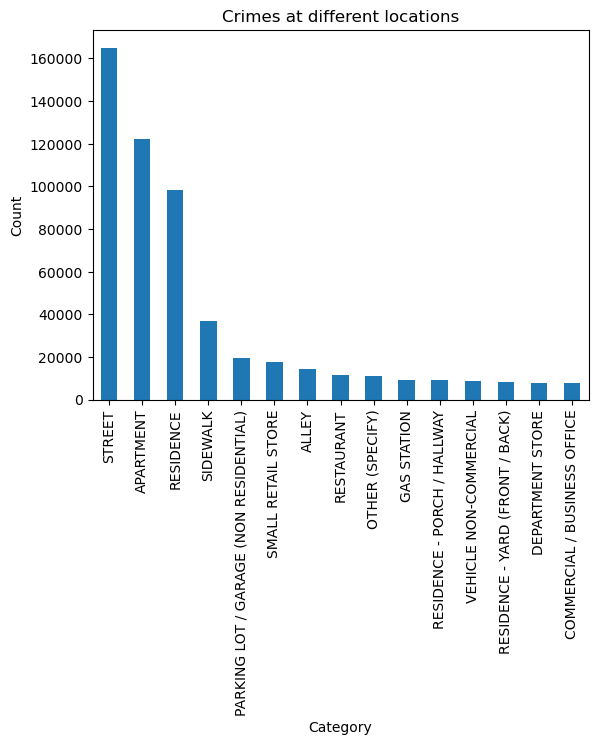

In [110]:
value_counts = df['Location Description'].value_counts()[:15]

value_counts.plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Crimes at different locations')
plt.show()

## Method: Transformation (Feature Engineering)

We focuses on extracting date and time-related features from the 'Date' column in the DataFrame. It creates new columns such as 'Hour,' 'Month,' 'Year,' and 'Day' to enhance the temporal analysis of crime data. Additionally, it groups the data based on various features and calculates the count of crimes, categorizing them into levels.

In [6]:
df.Date=pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)

df['Hour']=df['Date'].apply(lambda x:x.hour)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df['Day'] = df['Date'].apply(day_col)

df2 = df.groupby(['Month','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
df2['Level'] = df2['Primary Type'].apply(lambda x: 0 if x <= 10 else 1 if x <= 20 else 2)
final_df = df2[['Month','Day','Hour','District','Primary Type','Level']]

## Train-Test split

In [7]:
X = final_df.iloc[:,0:4].values 
y = final_df.iloc[:,5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

## Method: Scaling the training dataset

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Method: Statistical Analysis (chi-square)

This code snippet employs the chi2_contingency function from the scipy.stats module to perform a chi-square test of independence. The test is conducted on a contingency table created using the 'Month' and 'Level' columns from the final_df DataFrame.
The value (963.73) represents the test statistic for the chi-square test. It measures the discrepancy between the observed and expected frequencies in the contingency table and the p-value (1.015e-189) indicates strong evidence against the null hypothesis of independence. There is a significant association between the 'Month' and 'Level' variables.

The results suggest that the distribution of crime levels across months is not independent. There is a statistically significant relationship, and further investigation may be warranted to understand the nature of this association.

In [9]:
cont_table = pd.crosstab(index=final_df['Month'], columns=final_df['Level'])

chi2, p, dof, expected = chi2_contingency(cont_table)

print('Chi-square statistic:', chi2)
print('P-value:', p)

Chi-square statistic: 963.7336027083735
P-value: 1.0150848620873577e-189


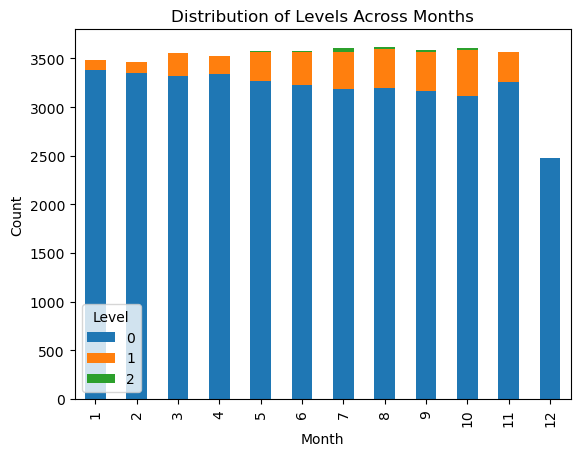

In [10]:
cont_table.plot(kind='bar', stacked=True)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Levels Across Months')
plt.legend(title='Level')

## Method: Anomaly Detection 

The application of the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm for anomaly detection on a dataset containing latitude and longitude information. Anomalies are identified based on the clustering results.

This approach helps identify anomalies in spatial data based on their deviation from the surrounding clusters. In this specific example, there are 33 anomalies, constituting a 0.02% anomaly rate in the dataset.

In [14]:
data = pd.read_csv('C:\\Users\\Predator\\Desktop\\RIT SEM 2\\FDS\\Project\\2022.csv')

data.dropna(inplace=True)

X = data[["Latitude", "Longitude"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.1, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

anomaly_mask = (clusters == -1)

num_anomalies = sum(anomaly_mask)
anomaly_rate = num_anomalies / len(data)
print(f"Number of anomalies: {num_anomalies}")
print(f"Anomaly rate: {anomaly_rate:.2%}")

Number of anomalies: 33
Anomaly rate: 0.02%


In [16]:
anomalies = data[anomaly_mask]

print(anomalies)

              ID Case Number                    Date  \
16693   12612831    JF138238  02/03/2022 01:30:00 PM   
24922   12621657    JF148808  02/18/2022 02:45:00 PM   
25838   12622711    JF150203  02/20/2022 07:40:00 AM   
26253   12623346    JF150991  02/21/2022 12:45:00 AM   
26551   12623847    JF151637  02/21/2022 03:45:00 PM   
36498   12639417    JF170127  03/11/2022 05:00:00 AM   
40920   12646276    JF178588  03/18/2022 03:20:00 PM   
46277   12654491    JF188374  03/27/2022 02:30:00 PM   
49017   12659317    JF194233  04/01/2022 08:15:00 AM   
51649   12667790    JF198273  04/05/2022 03:15:00 PM   
63765   12689730    JF229828  04/26/2022 07:15:00 AM   
64016   12683546    JF222979  04/26/2022 03:03:00 PM   
69951   12692006    JF232630  05/06/2022 02:00:00 PM   
96280   12737158    JF288189  06/15/2022 04:30:00 PM   
110903  12753506    JF308249  07/06/2022 06:00:00 AM   
113966  12757746    JF313533  07/10/2022 06:30:00 PM   
119139  12767664    JF322767  07/18/2022 10:30:0

### Printing the anomaly rows, showing only Latitude and Longitude columns

In [17]:
print(anomalies[["Latitude", "Longitude"]])

         Latitude  Longitude
16693   41.659181 -87.567354
24922   41.670217 -87.575327
25838   41.996235 -87.939733
26253   41.673676 -87.573877
26551   41.996235 -87.939733
36498   41.675212 -87.601682
40920   42.005740 -87.900486
46277   41.695482 -87.576634
49017   41.673676 -87.573877
51649   41.973291 -87.863089
63765   41.965057 -87.879953
64016   41.965057 -87.879953
69951   41.673676 -87.573877
96280   41.691135 -87.730347
110903  41.965057 -87.879953
113966  41.659183 -87.568840
119139  41.995434 -87.914046
126336  42.008940 -87.907058
135636  41.684225 -87.559373
138779  41.959945 -87.923044
141348  41.673676 -87.573877
141396  41.673676 -87.573877
145737  42.008962 -87.906491
154388  41.992470 -87.927882
167793  41.683054 -87.559086
169007  41.660263 -87.578682
174441  36.619446 -91.686566
177919  36.619446 -91.686566
178646  41.973173 -87.867848
188516  41.992470 -87.927882
203057  41.973291 -87.863089
206456  42.007135 -87.905815
216331  42.005708 -87.899927


## Method : Using a Random Forest Classifier

#### Grid search for parameter tuning

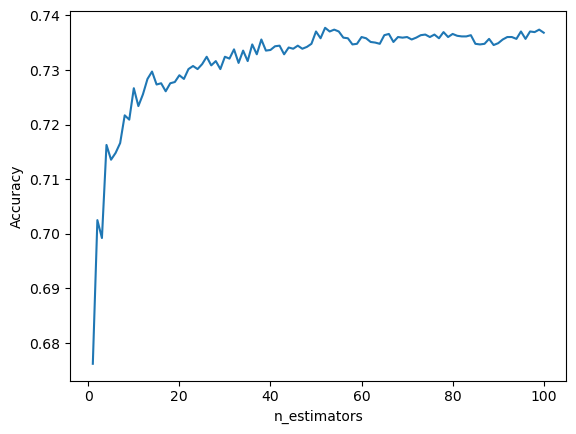

In [83]:
estimator_range = range(1, 101)

acc = []

for n in estimator_range:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=0)
    rf_model.fit(X_train, y_train)
    score = rf_model.score(X_test, y_test)
    acc.append(score)

plt.plot(estimator_range, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

#### Random Forest

The Random Forest Classifier achieved an accuracy of approximately 69.58% on the test data, indicating the percentage of correctly predicted labels.
R-Squared represents the proportion of variance in the target variable explained by the model. A higher R-squared value suggests better predictive performance.

MAE represents the average absolute difference between predicted and actual values. It is a measure of the model's average prediction error.

MSE represents the average squared difference between predicted and actual values. It quantifies the average magnitude of errors, with lower values indicating better model performance.

In [117]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 101)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test,y_pred)
print("R-Squared test:", r2)
print("MAE test:", mae)
print("MSE test:", mse)

Accuracy: 69.58223560406473 

R-Squared test: 0.40752276672137655
MAE test: 0.31027474595408355
MSE test: 0.32246894994354536


#### Random Forest with kfold

The mean accuracy across the 5 folds is approximately 74.07%, providing a more robust estimate of the classifier's performance compared to a single train-test split.

In [118]:
n_splits = 5

kf = KFold(n_splits=n_splits)

acc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = RandomForestClassifier()
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    acc_scores.append(metrics.accuracy_score(y_test, y_pred))
mean_accuracy = np.mean(accuracy_scores)

print("Mean accuracy:", mean_accuracy)

Mean accuracy: 0.7406571073726995


## Method: Using a clustering algorithm 

#### Grid search to find optimal K value

Text(0, 0.5, 'accuracy')

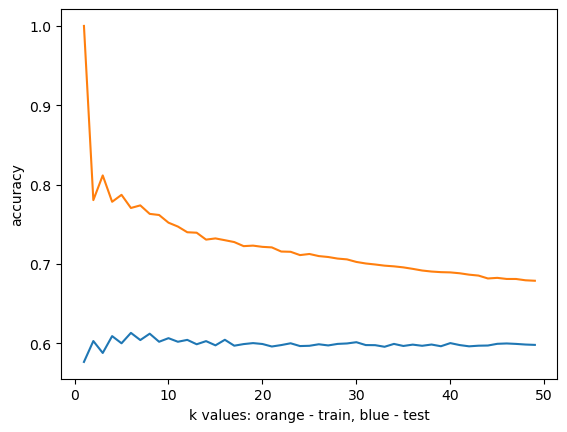

In [119]:
score_list_test = []
score_list_train = []

for each in range(1,50):
    knn1 = KNeighborsClassifier(n_neighbors= each)
    knn1.fit(X_train, y_train)
    score_list_test.append(knn1.score(X_test,y_test))
    score_list_train.append(knn1.score(X_train,y_train))

# Plot
plt.plot(range(1, 50), score_list_test)
plt.plot(range(1, 50), score_list_train)
plt.xlabel("k values: orange - train, blue - test")
plt.ylabel("accuracy")

#### KNN

The accuracy is approximately 59.71%, and additional regression metrics provide insights into the model's performance on the test data.

In [120]:
knn1 = KNeighborsClassifier(n_neighbors = 17)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test,y_pred)
print("R-Squared test:", r2)
print("MAE test:", mae)
print("MSE test:", mse)

Accuracy: 59.71093044263775 

R-Squared test: 0.09405517997934343
MAE test: 0.42920054200542007
MSE test: 0.4818202348690154


#### KNN with kfold

The averaged accuracy across the 10 folds is approximately 67.92%. This provides a more robust estimate of the KNN classifier's performance on the training data compared to a single train-test split.

In [121]:
model_1 = KNeighborsClassifier(n_neighbors=17)

kfold2 = KFold(n_splits=10, random_state=99, shuffle=True) 

cv_result1 = cross_val_score(model_1,
                            X_train,
                            y_train, 
                            cv = kfold2,
                            scoring = "accuracy")

print('Averaged Accuracy training k-fold - Model KNN:',cv_result1.mean())
y_fit1 = cross_val_predict(model_1,X_train,y_train, cv=10) 

Averaged Accuracy training k-fold - Model KNN: 0.679190092264863


## Method: Using a Decision Tree Regressor


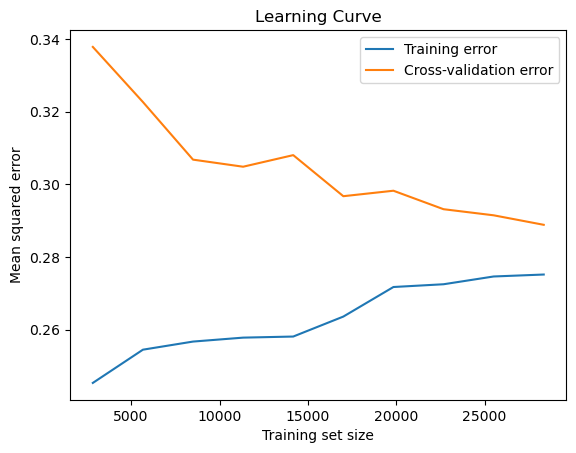

In [122]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=DecisionTreeRegressor(max_depth=5),
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation error')
plt.title('Learning Curve')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()

The best-performing Decision Tree Regressor has a maximum depth of 8, achieving an accuracy of approximately 59.71%. The reported metrics provide insights into the model's performance on the test data.

In [123]:
final_r2 = 0
final_mae = 0
final_mse = 0
final_acc = 0 

for depth in range(1,15):
    regr_2 = DecisionTreeRegressor(max_depth=depth)

    regr_2.fit(X_train, y_train)

    y_2 = regr_2.predict(X_test)

    mse = metrics.mean_squared_error(y_test, y_2)
    mae = metrics.mean_absolute_error(y_test, y_2)
    rmse = np.sqrt(mse) 
    r2 = metrics.r2_score(y_test,y_2)
    acc = metrics.accuracy_score(y_test, y_pred)*100
    if acc > final_acc:
        final_r2 = r2
        final_mae = mae
        final_mse = mse
        final_acc = acc
print("R-Squared test:", final_r2)
print("MAE test:", final_mae)
print("MSE test:", final_mse)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

R-Squared test: 0.12926964970340726
MAE test: 0.5565888869479028
MSE test: 0.4630916724905148
Accuracy: 59.71093044263775 



## Advance Method: Bagging Classifier

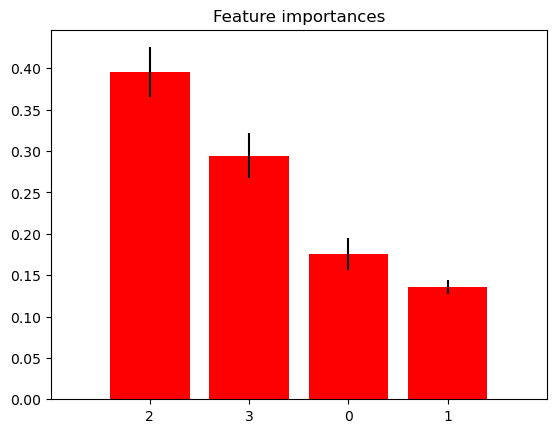

In [62]:
bagging_model = RandomForestRegressor(n_estimators=100, max_features='sqrt')
bagging_model.fit(X_train, y_train)

importances = bagging_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The AdaBoost Classifier achieved an accuracy of approximately 91.51% on the training set, and various regression metrics provide insights into its performance on the test data.

In [134]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10), n_estimators=200, 
    algorithm="SAMME.R", learning_rate=0.5) 

ada_clf.fit(X_train, y_train)

y_pred_rf = ada_clf.predict(X_test)

print("Accuracy",ada_clf.score(X_train, y_train))

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)
print("R-Squared:", r2)
print("MAE:", mae)
print("MSE:", mse)

Accuracy 0.9150906114153446
R-Squared: 0.19490443929732137
MAE: 0.3915989159891599
MSE: 0.4281842818428184


## Advance Method: Boosting ensemble technique

The Bagging Classifier achieved an accuracy of approximately 62.67% on the test set, and various regression metrics provide insights into its performance.

In [133]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features=4), n_estimators=500, 
    max_samples=1000, bootstrap=True, n_jobs=-1) 

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

print("Accuracy",metrics.accuracy_score(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)
print("R-Squared:", r2)
print("MAE:", mae)
print("MSE:", mse)

Accuracy 0.6266937669376694
R-Squared: 0.19490443929732137
MAE: 0.3915989159891599
MSE: 0.4281842818428184


The mean accuracy across the 5 folds is approximately 74.07%. Additionally, various regression metrics provide insights into the model's performance on the last test set (fold).

In [96]:
n_splits = 5
kf = KFold(n_splits=n_splits)
accuracy_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    
    clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 101)
    clf.fit(X_train, y_train)    
    y_pred = clf.predict(X_test)    
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))
mean_accuracy = np.mean(accuracy_scores)
print("Mean accuracy:", mean_accuracy)


mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test,y_pred)
print("R-Squared:", r2)
print("MAE:", mae)
print("MSE:", mse)

Mean accuracy: 0.7406571073726995
R-Squared test: 0.3485268233722869
MAE test: 0.26758496104775886
MSE test: 0.2840690978886756
